<a href="https://colab.research.google.com/github/dara6/analysis-course/blob/master/Nothwind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np

In [ ]:
df_o = pd.read_csv('/content/Orders.csv', sep = ';')
df_e = pd.read_excel('/content/Employees.xlsx')
df_od = pd.read_csv('/content/Order_details.csv', sep = ';')
df_c = pd.read_csv('/content/Customers.csv', sep=';')
df_p = pd.read_csv('/content/Products.csv', sep=';')

In [ ]:
df_o['OrderDate'] = df_o['OrderDate'].astype('datetime64')
df_o['ShippedDate'] = df_o['ShippedDate'].astype('datetime64')
df_o['RequiredDate'] = df_o['RequiredDate'].astype('datetime64')

In [ ]:
df_o['year'] = df_o['OrderDate'].dt.year
df_o['week'] = df_o['OrderDate'].dt.isocalendar().week

In [ ]:
df_new = df_o.merge(df_od)

In [ ]:
df_new['FactDiscount'] = df_new['Discount']*df_new['UnitPrice']*df_new['Quantity']
df_new['FactPrice'] = df_new['UnitPrice']*df_new['Quantity'] - df_new['FactDiscount']

In [ ]:
df_o_1997 = df_new[df_new['year'] == 1997].groupby('week').FactPrice.sum().reset_index()
df_o_1998 = df_new[df_new['year'] == 1998].groupby('week').FactPrice.sum().reset_index()

In [ ]:
df_o_1997 = df_o_1997.rename(columns={'FactPrice': 'fact_price_1997'})
df_o_1998 = df_o_1998.rename(columns={'FactPrice': 'fact_price_1998'})

In [ ]:
df_final = df_o_1997.merge(df_o_1998, how='inner')

<Axes: >

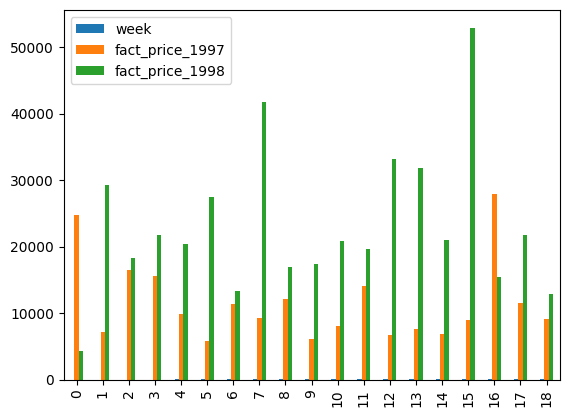

In [ ]:
df_final.plot(kind='bar')

In [ ]:
df_new_new = df_new.groupby('OrderID').agg({'FactPrice': 'sum'}).reset_index()

In [ ]:
df_o_1997 = df_new_new[df_new_new['year']]

In [ ]:
df_r = df_o.merge(df_e)
df_rr = df_r.groupby('EmployeeID').count().reset_index()

<Axes: >

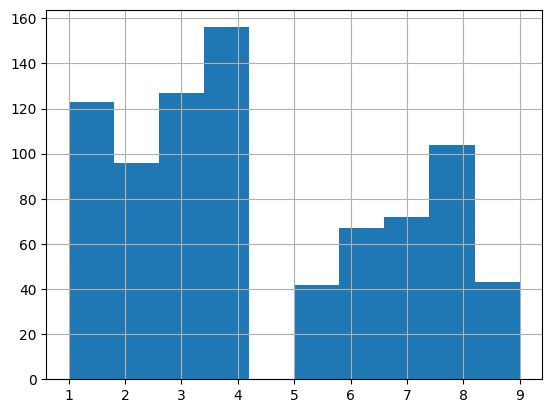

In [ ]:
df_o['EmployeeID'].hist()

array([[<Axes: title={'center': '42'}>, <Axes: title={'center': '43'}>,
        <Axes: title={'center': '67'}>],
       [<Axes: title={'center': '72'}>, <Axes: title={'center': '96'}>,
        <Axes: title={'center': '104'}>],
       [<Axes: title={'center': '123'}>, <Axes: title={'center': '127'}>,
        <Axes: title={'center': '156'}>]], dtype=object)

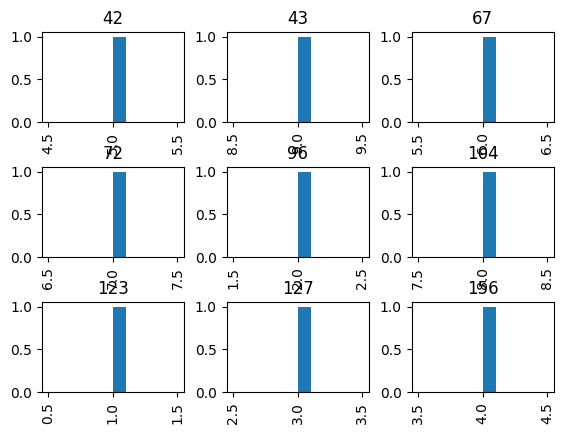

In [ ]:
df_rr.hist(column='EmployeeID', by='OrderID')

In [ ]:

df_c.iloc[:20]

,CustomerID,ContactName,ContactTitle,Phone,Address
0,ALFKI,Maria Anders,Sales Representative,030-0074321,Obere Str. 57
1,ANATR,Ana Trujillo,Owner,(5) 555-4729,Avda. de la Constitucion 2222
2,ANTON,Antonio Moreno,Owner,(5) 555-3932,Mataderos 2312
3,AROUT,Thomas Hardy,Sales Representative,(171) 555-7788,120 Hanover Sq.
4,BERGS,Christina Berglund,Order Administrator,0921-12 34 65,Berguvsv?gen 8
5,BLAUS,Hanna Moos,Sales Representative,0621-08460,Forsterstr. 57
6,BLONP,Frederique Citeaux,Marketing Manager,88.60.15.31,"24, place Kleber"
7,BOLID,Martin Sommer,Owner,(91) 555 22 82,"C/ Araquil, 67"
8,BONAP,Laurence Lebihan,Owner,91.24.45.40,"12, rue des Bouchers"
9,BOTTM,Elizabeth Lincoln,Accounting Manager,(604) 555-4729,23 Tsawassen Blvd.


In [ ]:
df_o['OrderDate']=df_o['OrderDate'].astype('datetime64')

In [ ]:
df_o['quarter'] = df_o['OrderDate'].dt.quarter
df_o['year'] = df_o['OrderDate'].dt.year

In [ ]:
df_o_for_pivoting = df_o.groupby(['year', 'quarter']).OrderID.count().reset_index()

In [ ]:
df_o_for_pivoting.pivot_table(values='OrderID', index='year', columns='quarter', fill_value=0)

quarter,1,2,3,4
year,,,,
1996,0,0,70,82
1997,92,93,103,120
1998,182,88,0,0


In [ ]:
df_sex = pd.DataFrame({'TitleOfCourtesy': ['Ms.', 'Dr.', 'Mrs.', 'Mr.'], 'Sex': ['female', 'male', 'female', 'male']})
df_sex

,TitleOfCourtesy,Sex
0,Ms.,female
1,Dr.,male
2,Mrs.,female
3,Mr.,male


In [ ]:
df=df_e.merge(df_sex).merge(df_o)
df

,EmployeeID,FirstName,LastName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,HomePhone,Sex,OrderID,CustomerID,OrderDate,RequiredDate,ShippedDate,Freight
0,1,Nancy,Davolio,Sales Representative,Ms.,1948-12-08 00:00:00.000,1992-05-01 00:00:00.000,507 - 20th Ave. E. Apt. 2A,(206) 555-9857,female,10258,ERNSH,1996-07-17 00:00:00.000,1996-08-14 00:00:00.000,1996-07-23 00:00:00.000,140.51
1,1,Nancy,Davolio,Sales Representative,Ms.,1948-12-08 00:00:00.000,1992-05-01 00:00:00.000,507 - 20th Ave. E. Apt. 2A,(206) 555-9857,female,10270,WARTH,1996-08-01 00:00:00.000,1996-08-29 00:00:00.000,1996-08-02 00:00:00.000,136.54
2,1,Nancy,Davolio,Sales Representative,Ms.,1948-12-08 00:00:00.000,1992-05-01 00:00:00.000,507 - 20th Ave. E. Apt. 2A,(206) 555-9857,female,10275,MAGAA,1996-08-07 00:00:00.000,1996-09-04 00:00:00.000,1996-08-09 00:00:00.000,26.93
3,1,Nancy,Davolio,Sales Representative,Ms.,1948-12-08 00:00:00.000,1992-05-01 00:00:00.000,507 - 20th Ave. E. Apt. 2A,(206) 555-9857,female,10285,QUICK,1996-08-20 00:00:00.000,1996-09-17 00:00:00.000,1996-08-26 00:00:00.000,76.83
4,1,Nancy,Davolio,Sales Representative,Ms.,1948-12-08 00:00:00.000,1992-05-01 00:00:00.000,507 - 20th Ave. E. Apt. 2A,(206) 555-9857,female,10292,TRADH,1996-08-28 00:00:00.000,1996-09-25 00:00:00.000,1996-09-02 00:00:00.000,1.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,7,Robert,King,Sales Representative,Mr.,1960-05-29 00:00:00.000,1994-01-02 00:00:00.000,Edgeham Hollow Winchester Way,(71) 555-5598,male,11048,BOTTM,1998-04-24 00:00:00.000,1998-05-22 00:00:00.000,1998-04-30 00:00:00.000,24.12
826,7,Robert,King,Sales Representative,Mr.,1960-05-29 00:00:00.000,1994-01-02 00:00:00.000,Edgeham Hollow Winchester Way,(71) 555-5598,male,11051,LAMAI,1998-04-27 00:00:00.000,1998-05-25 00:00:00.000,NaN,2.79
827,7,Robert,King,Sales Representative,Mr.,1960-05-29 00:00:00.000,1994-01-02 00:00:00.000,Edgeham Hollow Winchester Way,(71) 555-5598,male,11055,HILAA,1998-04-28 00:00:00.000,1998-05-26 00:00:00.000,1998-05-05 00:00:00.000,120.92
828,7,Robert,King,Sales Representative,Mr.,1960-05-29 00:00:00.000,1994-01-02 00:00:00.000,Edgeham Hollow Winchester Way,(71) 555-5598,male,11066,WHITC,1998-05-01 00:00:00.000,1998-05-29 00:00:00.000,1998-05-04 00:00:00.000,44.72


In [ ]:
df.groupby('Sex').OrderID.count()

Sex
female    553
male      277
Name: OrderID, dtype: int64

In [ ]:
df_o['year'] = df_o['OrderDate'].dt.year
df_o['month'] = df_o['OrderDate'].dt.month
df_o.groupby(['year', 'month']).count()

OrderID  CustomerID  EmployeeID  OrderDate  RequiredDate  \
year month                                                             
1996 7           22          22          22         22            22   
     8           25          25          25         25            25   
     9           23          23          23         23            23   
     10          26          26          26         26            26   
     11          25          25          25         25            25   
     12          31          31          31         31            31   
1997 1           33          33          33         33            33   
     2           29          29          29         29            29   
     3           30          30          30         30            30   
     4           31          31          31         31            31   
     5           32          32          32         32            32   
     6           30          30          30         30            30   
     7           33          33          33         33            33   
     8           33          33          33         33            33   
     9           37          37          37         37            37   
     10          38          38          38         38            38   
     11          34          34          34         34            34   
     12          48          48          48         48            48   
1998 1           55          55          55         55            55   
     2           54          54          54         54            54   
     3           73          73          73         73            73   
     4           74          74          74         74            74   
     5           14          14          14         14            14   

            ShippedDate  Freight  quarter  
year month                                 
1996 7               22       22       22  
     8               25       25       25  
     9               23       23       23  
     10              26       26       26  
     11              25       25       25  
     12              31       31       31  
1997 1               33       33       33  
     2               29       29       29  
     3               30       30       30  
     4               31       31       31  
     5               32       32       32  
     6               30       30       30  
     7               33       33       33  
     8               33       33       33  
     9               37       37       37  
     10              38       38       38  
     11              34       34       34  
     12              48       48       48  
1998 1               55       55       55  
     2               54       54       54  
     3               73       73       73  
     4               63       74       74  
     5                4       14       14

In [ ]:
df_o['year'] = df_o['OrderDate'].dt.year
df_o['week'] = df_o['OrderDate'].dt.isocalendar().week

In [ ]:
df_week = df_o.groupby(['year', 'week']).count()

In [ ]:
df_week.head(40)

OrderID  CustomerID  EmployeeID  OrderDate  RequiredDate  \
year week                                                             
1996 1           2           2           2          2             2   
     27          2           2           2          2             2   
     28          6           6           6          6             6   
     29          6           6           6          6             6   
     30          5           5           5          5             5   
     31          6           6           6          6             6   
     32          5           5           5          5             5   
     33          6           6           6          6             6   
     34          5           5           5          5             5   
     35          6           6           6          6             6   
     36          5           5           5          5             5   
     37          6           6           6          6             6   
     38          6           6           6          6             6   
     39          5           5           5          5             5   
     40          6           6           6          6             6   
     41          5           5           5          5             5   
     42          6           6           6          6             6   
     43          5           5           5          5             5   
     44          6           6           6          6             6   
     45          5           5           5          5             5   
     46          6           6           6          6             6   
     47          6           6           6          6             6   
     48          7           7           7          7             7   
     49          7           7           7          7             7   
     50          7           7           7          7             7   
     51          7           7           7          7             7   
     52          8           8           8          8             8   
1997 1          12          12          12         12            12   
     2           7           7           7          7             7   
     3           7           7           7          7             7   
     4           7           7           7          7             7   
     5           7           7           7          7             7   
     6           7           7           7          7             7   
     7           8           8           8          8             8   
     8           7           7           7          7             7   
     9           7           7           7          7             7   
     10          7           7           7          7             7   
     11          7           7           7          7             7   
     12          7           7           7          7             7   
     13          7           7           7          7             7   

           ShippedDate  Freight  quarter  month  
year week                                        
1996 1               2        2        2      2  
     27              2        2        2      2  
     28              6        6        6      6  
     29              6        6        6      6  
     30              5        5        5      5  
     31              6        6        6      6  
     32              5        5        5      5  
     33              6        6        6      6  
     34              5        5        5      5  
     35              6        6        6      6  
     36              5        5        5      5  
     37              6        6        6      6  
     38              6        6        6      6  
     39              5        5        5      5  
     40              6        6        6      6  
     41              5        5        5      5  
     42              6        6        6      6  
     43              5        5        5      5  
     44              6      

In [ ]:
df_od['FactDiscount'] = df_od['UnitPrice'] * df_od['Quantity'] * df_od['Discount']
df_od['FactPrice'] = df_od['UnitPrice'] * df_od['Quantity'] - df_od['FactDiscount']
df_od

,OrderID,ProductID,UnitPrice,Quantity,Discount,FactDiscount,FactPrice
0,10248,11,14.00,12,0.00,0.000,168.000
1,10248,42,9.80,10,0.00,0.000,98.000
2,10248,72,34.80,5,0.00,0.000,174.000
3,10249,14,18.60,9,0.00,0.000,167.400
4,10249,51,42.40,40,0.00,0.000,1696.000
...,...,...,...,...,...,...,...
2150,11077,64,33.25,2,0.03,1.995,64.505
2151,11077,66,17.00,1,0.00,0.000,17.000
2152,11077,73,15.00,2,0.01,0.300,29.700
2153,11077,75,7.75,4,0.00,0.000,31.000


In [ ]:
df_employee = df_o.merge(df_od)
df_employee['year'] = df_employee['OrderDate'].dt.year
df_employee['month'] = df_employee['OrderDate'].dt.month

In [ ]:
df_employee.groupby(['year', 'EmployeeID', 'month']).agg({'FactPrice': 'sum'}).max()

FactPrice    30990.28
dtype: float64

In [ ]:
df_o

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,Freight,quarter,month
0,10248,VINET,5,1996-07-04,1996-08-01 00:00:00.000,1996-07-16 00:00:00.000,32.38,3,7
1,10249,TOMSP,6,1996-07-05,1996-08-16 00:00:00.000,1996-07-10 00:00:00.000,11.61,3,7
2,10250,HANAR,4,1996-07-08,1996-08-05 00:00:00.000,1996-07-12 00:00:00.000,65.83,3,7
3,10251,VICTE,3,1996-07-08,1996-08-05 00:00:00.000,1996-07-15 00:00:00.000,41.34,3,7
4,10252,SUPRD,4,1996-07-09,1996-08-06 00:00:00.000,1996-07-11 00:00:00.000,51.30,3,7
...,...,...,...,...,...,...,...,...,...
825,11073,PERIC,2,1998-05-05,1998-06-02 00:00:00.000,NaN,24.95,2,5
826,11074,SIMOB,7,1998-05-06,1998-06-03 00:00:00.000,NaN,18.44,2,5
827,11075,RICSU,8,1998-05-06,1998-06-03 00:00:00.000,NaN,6.19,2,5
828,11076,BONAP,4,1998-05-06,1998-06-03 00:00:00.000,NaN,38.28,2,5


In [ ]:
df_c.groupby('ContactTitle').count()

,CustomerID,ContactName,Phone,Address
ContactTitle,,,,
Accounting Manager,10,10,10,10
Assistant Sales Agent,2,2,2,2
Assistant Sales Representative,1,1,1,1
Marketing Assistant,6,6,6,6
Marketing Manager,12,12,12,12
Order Administrator,2,2,2,2
Owner,17,17,17,17
Owner/Marketing Assistant,1,1,1,1
Sales Agent,5,5,5,5


In [ ]:
df_o.groupby('EmployeeID').count()

,OrderID,CustomerID,OrderDate,RequiredDate,ShippedDate,Freight
EmployeeID,,,,,,
1,123,123,123,123,120,123
2,96,96,96,96,93,96
3,127,127,127,127,127,127
4,156,156,156,156,151,156
5,42,42,42,42,42,42
6,67,67,67,67,65,67
7,72,72,72,72,69,72
8,104,104,104,104,100,104
9,43,43,43,43,42,43


In [ ]:
df_new = df_o.merge(df_e)

In [ ]:
df_e[df_e['EmployeeID']==4]

,EmployeeID,FirstName,LastName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,HomePhone
3,4,Margaret,Peacock,Sales Representative,Mrs.,1937-09-19 00:00:00.000,1993-05-03 00:00:00.000,4110 Old Redmond Rd.,(206) 555-8122


In [ ]:
df_o.groupby('EmployeeID').count()

,OrderID,CustomerID,OrderDate,RequiredDate,ShippedDate,Freight
EmployeeID,,,,,,
1,123,123,123,123,120,123
2,96,96,96,96,93,96
3,127,127,127,127,127,127
4,156,156,156,156,151,156
5,42,42,42,42,42,42
6,67,67,67,67,65,67
7,72,72,72,72,69,72
8,104,104,104,104,100,104
9,43,43,43,43,42,43


In [ ]:
df_o['OrderDate'].astype('datetime64')
df_o.groupby('OrderDate').count()

,OrderID,CustomerID,EmployeeID,RequiredDate,ShippedDate,Freight
OrderDate,,,,,,
1996-07-04 00:00:00.000,1,1,1,1,1,1
1996-07-05 00:00:00.000,1,1,1,1,1,1
1996-07-08 00:00:00.000,2,2,2,2,2,2
1996-07-09 00:00:00.000,1,1,1,1,1,1
1996-07-10 00:00:00.000,1,1,1,1,1,1
...,...,...,...,...,...,...
1998-04-30 00:00:00.000,4,4,4,4,2,4
1998-05-01 00:00:00.000,3,3,3,3,2,3
1998-05-04 00:00:00.000,3,3,3,3,2,3


from matplotlib import pyplot as plt
_df_0['OrderID'].plot(kind='hist', bins=20, title='OrderID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['EmployeeID'].plot(kind='hist', bins=20, title='EmployeeID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['RequiredDate'].plot(kind='hist', bins=20, title='RequiredDate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='OrderID', y='CustomerID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='CustomerID', y='EmployeeID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='EmployeeID', y='RequiredDate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='RequiredDate', y='ShippedDate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RequiredDate']
  ys = series['OrderID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('RequiredDate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RequiredDate')
_ = plt.ylabel('OrderID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RequiredDate']
  ys = series['CustomerID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('RequiredDate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RequiredDate')
_ = plt.ylabel('CustomerID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RequiredDate']
  ys = series['EmployeeID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('RequiredDate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RequiredDate')
_ = plt.ylabel('EmployeeID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RequiredDate']
  ys = series['Freight']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('RequiredDate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RequiredDate')
_ = plt.ylabel('Freight')

from matplotlib import pyplot as plt
_df_12['OrderID'].plot(kind='line', figsize=(8, 4), title='OrderID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['EmployeeID'].plot(kind='line', figsize=(8, 4), title='EmployeeID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['RequiredDate'].plot(kind='line', figsize=(8, 4), title='RequiredDate')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df_o.groupby(['EmployeeID', 'CustomerID']).count().max().reset_index()

,index,0
0,OrderID,6
1,OrderDate,6
2,RequiredDate,6
3,ShippedDate,6
4,Freight,6


In [ ]:
df_od['FactDiscount']=df_od['UnitPrice']*df_od['Discount']*df_od['Quantity']

In [ ]:
df_od['FactPrice']=df_od['UnitPrice']*df_od['Quantity']-df_od['FactDiscount']
df_od

,OrderID,ProductID,UnitPrice,Quantity,Discount,FactDiscount,FactPrice
0,10248,11,14.00,12,0.00,0.000,168.000
1,10248,42,9.80,10,0.00,0.000,98.000
2,10248,72,34.80,5,0.00,0.000,174.000
3,10249,14,18.60,9,0.00,0.000,167.400
4,10249,51,42.40,40,0.00,0.000,1696.000
...,...,...,...,...,...,...,...
2150,11077,64,33.25,2,0.03,1.995,64.505
2151,11077,66,17.00,1,0.00,0.000,17.000
2152,11077,73,15.00,2,0.01,0.300,29.700
2153,11077,75,7.75,4,0.00,0.000,31.000


In [ ]:
df_od.merge(df_o)

,OrderID,ProductID,UnitPrice,Quantity,Discount,FactDiscount,FactPrice,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,Freight
0,10248,11,14.00,12,0.00,0.000,168.000,VINET,5,1996-07-04 00:00:00.000,1996-08-01 00:00:00.000,1996-07-16 00:00:00.000,32.38
1,10248,42,9.80,10,0.00,0.000,98.000,VINET,5,1996-07-04 00:00:00.000,1996-08-01 00:00:00.000,1996-07-16 00:00:00.000,32.38
2,10248,72,34.80,5,0.00,0.000,174.000,VINET,5,1996-07-04 00:00:00.000,1996-08-01 00:00:00.000,1996-07-16 00:00:00.000,32.38
3,10249,14,18.60,9,0.00,0.000,167.400,TOMSP,6,1996-07-05 00:00:00.000,1996-08-16 00:00:00.000,1996-07-10 00:00:00.000,11.61
4,10249,51,42.40,40,0.00,0.000,1696.000,TOMSP,6,1996-07-05 00:00:00.000,1996-08-16 00:00:00.000,1996-07-10 00:00:00.000,11.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,11077,64,33.25,2,0.03,1.995,64.505,RATTC,1,1998-05-06 00:00:00.000,1998-06-03 00:00:00.000,NaN,8.53
2151,11077,66,17.00,1,0.00,0.000,17.000,RATTC,1,1998-05-06 00:00:00.000,1998-06-03 00:00:00.000,NaN,8.53
2152,11077,73,15.00,2,0.01,0.300,29.700,RATTC,1,1998-05-06 00:00:00.000,1998-06-03 00:00:00.000,NaN,8.53
2153,11077,75,7.75,4,0.00,0.000,31.000,RATTC,1,1998-05-06 00:00:00.000,1998-06-03 00:00:00.000,NaN,8.53


In [ ]:
df_k = df_od.merge(df_o)
df_k

,OrderID,ProductID,UnitPrice,Quantity,Discount,FactDiscount,FactPrice,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,Freight
0,10248,11,14.00,12,0.00,0.000,168.000,VINET,5,1996-07-04 00:00:00.000,1996-08-01 00:00:00.000,1996-07-16 00:00:00.000,32.38
1,10248,42,9.80,10,0.00,0.000,98.000,VINET,5,1996-07-04 00:00:00.000,1996-08-01 00:00:00.000,1996-07-16 00:00:00.000,32.38
2,10248,72,34.80,5,0.00,0.000,174.000,VINET,5,1996-07-04 00:00:00.000,1996-08-01 00:00:00.000,1996-07-16 00:00:00.000,32.38
3,10249,14,18.60,9,0.00,0.000,167.400,TOMSP,6,1996-07-05 00:00:00.000,1996-08-16 00:00:00.000,1996-07-10 00:00:00.000,11.61
4,10249,51,42.40,40,0.00,0.000,1696.000,TOMSP,6,1996-07-05 00:00:00.000,1996-08-16 00:00:00.000,1996-07-10 00:00:00.000,11.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,11077,64,33.25,2,0.03,1.995,64.505,RATTC,1,1998-05-06 00:00:00.000,1998-06-03 00:00:00.000,NaN,8.53
2151,11077,66,17.00,1,0.00,0.000,17.000,RATTC,1,1998-05-06 00:00:00.000,1998-06-03 00:00:00.000,NaN,8.53
2152,11077,73,15.00,2,0.01,0.300,29.700,RATTC,1,1998-05-06 00:00:00.000,1998-06-03 00:00:00.000,NaN,8.53
2153,11077,75,7.75,4,0.00,0.000,31.000,RATTC,1,1998-05-06 00:00:00.000,1998-06-03 00:00:00.000,NaN,8.53


In [ ]:
df_k_2=df_k.groupby('OrderID').agg({'FactPrice': 'sum'}).reset_index()
df_k_2

,OrderID,FactPrice
0,10248,440.0000
1,10249,1863.4000
2,10250,1552.6000
3,10251,654.0600
4,10252,3597.9000
...,...,...
825,11073,300.0000
826,11074,232.0850
827,11075,498.1000
828,11076,792.7500


In [ ]:
df_k_2['bins'] = pd.cut(df_k_2['FactPrice'], 5)

In [ ]:
df_k_2.groupby('bins').OrderID.count()

bins
(-3.875, 3287.5]      750
(3287.5, 6562.5]       60
(6562.5, 9837.5]        9
(9837.5, 13112.5]       9
(13112.5, 16387.5]      2
Name: OrderID, dtype: int64

In [ ]:
df_od['bins'] = pd.cut(df_od)

In [ ]:
df_lala=df_o.merge(df_c).merge(df_od)

In [ ]:
df_lala.groupby('ContactName').agg({'FactPrice': 'sum'}).sort_values('FactPrice', ascending=False)

,FactPrice
ContactName,
Horst Kloss,110277.3050
Roland Mendel,104874.9785
Jose Pavarotti,104361.9500
Paula Wilson,51097.8005
Patricia McKenna,49979.9050
...,...
Eduardo Saavedra,836.7000
Simon Crowther,649.0000
Yoshi Tannamuri,522.5000


In [ ]:
df_la=df_od.merge(df_p, left_on = 'ProductID', right_on = 'ProductID')

In [ ]:
df_la.groupby('CategoryName').sum('FactPrice').sort_values('FactPrice', ascending=False)

,OrderID,ProductID,UnitPrice_x,Quantity,Discount,FactDiscount,FactPrice,UnitPrice_y,CategoryID
CategoryName,,,,,,,,,
Beverages,4312144,16356,11811.65,9532,25.00,18658.7700,267868.1800,12599.00,404
Dairy Products,3894474,17806,9875.80,9149,19.56,16823.2150,234507.2850,10572.90,1464
Confections,3557446,12147,7549.30,7906,19.02,9741.8750,167357.2250,8073.11,1002
Meat/Poultry,1839680,6951,7417.33,4199,11.15,15166.4405,163022.3595,7933.48,1038
Seafood,3523066,11139,6290.78,7681,19.88,10361.3525,131261.7375,6637.43,2640
Condiments,2303505,9557,4605.30,5298,11.37,7647.6650,106047.0850,4887.20,432
Produce,1450501,4386,4786.45,2990,6.18,5284.0200,99984.5800,5083.30,952
Grains/Cereals,2090139,9567,4164.30,4562,8.88,4982.2125,95744.5875,4443.00,980


In [ ]:
df_od_2 = df_od.groupby('OrderID').agg({'FactDiscount': 'sum', 'FactPrice': 'sum'}).reset_index()

In [ ]:
df_od_2.FactPrice.max()

16387.5

In [ ]:
df_od_2[df_od_2['FactPrice']==16387.5]

,OrderID,FactDiscount,FactPrice
617,10865,862.5,16387.5


In [ ]:
len(df_p[df_p['UnitPrice'].between(18, 22, inclusive='both')])

16

In [ ]:
df_o['OrderDate'].astype('datetime64')

0     1996-07-04
1     1996-07-05
2     1996-07-08
3     1996-07-08
4     1996-07-09
         ...    
825   1998-05-05
826   1998-05-06
827   1998-05-06
828   1998-05-06
829   1998-05-06
Name: OrderDate, Length: 830, dtype: datetime64[ns]

In [ ]:
len(df_o[(df_o['Freight'] > 500)|(df_o['OrderDate'].between('1997-01-01', '1997-12-31'))])

414

In [ ]:
df_c[df_c['ContactName'].str.startswith('A')].shape

(10, 5)

In [ ]:
len(df_c[df_c['Phone'].str.contains('5555')])

2

In [ ]:
df_o[df_o['OrderDate'].between('1997-01-01', '1997-12-31')].sort_values('Freight', ascending=False)

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,Freight
292,10540,QUICK,3,1997-05-19 00:00:00.000,1997-06-16 00:00:00.000,1997-06-13 00:00:00.000,1007.64
443,10691,QUICK,2,1997-10-03 00:00:00.000,1997-11-14 00:00:00.000,1997-10-22 00:00:00.000,810.05
266,10514,ERNSH,3,1997-04-22 00:00:00.000,1997-05-20 00:00:00.000,1997-05-16 00:00:00.000,789.95
231,10479,RATTC,3,1997-03-19 00:00:00.000,1997-04-16 00:00:00.000,1997-03-21 00:00:00.000,708.95
364,10612,SAVEA,1,1997-07-28 00:00:00.000,1997-08-25 00:00:00.000,1997-08-01 00:00:00.000,544.08
...,...,...,...,...,...,...,...
451,10699,MORGK,3,1997-10-09 00:00:00.000,1997-11-06 00:00:00.000,1997-10-13 00:00:00.000,0.58
338,10586,REGGC,9,1997-07-02 00:00:00.000,1997-07-30 00:00:00.000,1997-07-09 00:00:00.000,0.48
167,10415,HUNGC,3,1997-01-15 00:00:00.000,1997-02-12 00:00:00.000,1997-01-24 00:00:00.000,0.20
261,10509,BLAUS,4,1997-04-17 00:00:00.000,1997-05-15 00:00:00.000,1997-04-29 00:00:00.000,0.15


In [ ]:
df_o[df_o['OrderDate'].between('1997-01-01', '1997-12-31')].sort_values(['CustomerID', 'Freight'], ascending=[True, True]).head(20)

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,Freight
454,10702,ALFKI,4,1997-10-13 00:00:00.000,1997-11-24 00:00:00.000,1997-10-21 00:00:00.000,23.94
395,10643,ALFKI,6,1997-08-25 00:00:00.000,1997-09-22 00:00:00.000,1997-09-02 00:00:00.000,29.46
444,10692,ALFKI,4,1997-10-03 00:00:00.000,1997-10-31 00:00:00.000,1997-10-13 00:00:00.000,61.02
511,10759,ANATR,3,1997-11-28 00:00:00.000,1997-12-26 00:00:00.000,1997-12-12 00:00:00.000,11.99
377,10625,ANATR,3,1997-08-08 00:00:00.000,1997-09-05 00:00:00.000,1997-08-14 00:00:00.000,43.90
429,10677,ANTON,1,1997-09-22 00:00:00.000,1997-10-20 00:00:00.000,1997-09-26 00:00:00.000,4.03
287,10535,ANTON,4,1997-05-13 00:00:00.000,1997-06-10 00:00:00.000,1997-05-21 00:00:00.000,15.64
434,10682,ANTON,3,1997-09-25 00:00:00.000,1997-10-23 00:00:00.000,1997-10-01 00:00:00.000,36.13
259,10507,ANTON,7,1997-04-15 00:00:00.000,1997-05-13 00:00:00.000,1997-04-22 00:00:00.000,47.45
325,10573,ANTON,7,1997-06-19 00:00:00.000,1997-07-17 00:00:00.000,1997-06-20 00:00:00.000,84.84


In [ ]:
df_c[df_c['ContactTitle'].isin(['Sales Representative', 'Owner'])].CustomerID.count()

34

In [ ]:
df_o.Freight.agg(['min', 'max'])

min       0.02
max    1007.64
Name: Freight, dtype: float64

In [ ]:
df_o['OrderDate'].astype('datetime64')

0     1996-07-04
1     1996-07-05
2     1996-07-08
3     1996-07-08
4     1996-07-09
         ...    
825   1998-05-05
826   1998-05-06
827   1998-05-06
828   1998-05-06
829   1998-05-06
Name: OrderDate, Length: 830, dtype: datetime64[ns]

In [ ]:
df_o[df_o['OrderDate'].between('1998-02-26', '1998-02-26')]

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,Freight


In [ ]:
df_c.dtypes

CustomerID      object
ContactName     object
ContactTitle    object
Phone           object
Address         object
dtype: object

In [ ]:
df_c[df_c['ContactTitle'] == 'Owner'].shape

(17, 5)

In [ ]:
df_o['OrderDate'] = df_o['OrderDate'].astype('datetime64')

In [ ]:
df_o[df_o['Freight'] <= 10.98].shape

(184, 7)

In [ ]:
df_c[df_c['ContactTitle'].isin(['Sales Representative','Sales Agent','Sales Associate','Sales Manager','Assistant Sales Agent', 'Assistant Sales Representative'])].shape

(43, 5)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df_o

NameError: name 'df_o' is not defined

In [ ]:
df_od

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.00,12,0.00
1,10248,42,9.80,10,0.00
2,10248,72,34.80,5,0.00
3,10249,14,18.60,9,0.00
4,10249,51,42.40,40,0.00
...,...,...,...,...,...
2150,11077,64,33.25,2,0.03
2151,11077,66,17.00,1,0.00
2152,11077,73,15.00,2,0.01
2153,11077,75,7.75,4,0.00


In [ ]:
df_e = pd.read_excel('/content/Employees.xlsx', sheet_name='Лист3')

In [ ]:
df_e

,Возраст
0,44
1,35
2,31
3,38
4,32
5,53
6,61
7,63
8,59
9,52


In [ ]:
df_e.describe()

,Возраст
count,32.000000
mean,42.750000
std,12.373228
min,21.000000
25%,32.750000
50%,41.500000
75%,51.250000
max,68.000000


In [ ]:
df_o.dtypes

OrderID           int64
CustomerID       object
EmployeeID        int64
OrderDate        object
RequiredDate     object
ShippedDate      object
Freight         float64
dtype: object

In [ ]:
df_c = pd.read_csv('/content/Customers.csv', sep=';')

In [ ]:
df_c.head(25)

,CustomerID,ContactName,ContactTitle,Phone,Address
0,ALFKI,Maria Anders,Sales Representative,030-0074321,Obere Str. 57
1,ANATR,Ana Trujillo,Owner,(5) 555-4729,Avda. de la Constitucion 2222
2,ANTON,Antonio Moreno,Owner,(5) 555-3932,Mataderos 2312
3,AROUT,Thomas Hardy,Sales Representative,(171) 555-7788,120 Hanover Sq.
4,BERGS,Christina Berglund,Order Administrator,0921-12 34 65,Berguvsv?gen 8
5,BLAUS,Hanna Moos,Sales Representative,0621-08460,Forsterstr. 57
6,BLONP,Frederique Citeaux,Marketing Manager,88.60.15.31,"24, place Kleber"
7,BOLID,Martin Sommer,Owner,(91) 555 22 82,"C/ Araquil, 67"
8,BONAP,Laurence Lebihan,Owner,91.24.45.40,"12, rue des Bouchers"
9,BOTTM,Elizabeth Lincoln,Accounting Manager,(604) 555-4729,23 Tsawassen Blvd.


In [ ]:
df_e.dtypes

Возраст    int64
dtype: object

In [ ]:
a = pd.DataFrame({'Title': df_c['ContactTitle']})
b = pd.DataFrame({'Title': df_e['Title']})

In [ ]:
c = pd.concat([a, b])

In [ ]:
c[c['Title']=='Sales Representative'].count()

Title    23
dtype: int64

In [ ]:
df_o['OrderDate'] = df_o['OrderDate'].astype('datetime64')
df_o[(df_o['OrderDate'].between('1997-01-01', '1997-12-31', inclusive='both'))|(df_o['Freight'] > 500)]

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,Freight
124,10372,QUEEN,5,1996-12-04,1997-01-01 00:00:00.000,1996-12-09 00:00:00.000,890.78
152,10400,EASTC,1,1997-01-01,1997-01-29 00:00:00.000,1997-01-16 00:00:00.000,83.93
153,10401,RATTC,1,1997-01-01,1997-01-29 00:00:00.000,1997-01-10 00:00:00.000,12.51
154,10402,ERNSH,8,1997-01-02,1997-02-13 00:00:00.000,1997-01-10 00:00:00.000,67.88
155,10403,ERNSH,4,1997-01-03,1997-01-31 00:00:00.000,1997-01-09 00:00:00.000,73.79
...,...,...,...,...,...,...,...
664,10912,HUNGO,2,1998-02-26,1998-03-26 00:00:00.000,1998-03-18 00:00:00.000,580.91
735,10983,SAVEA,2,1998-03-27,1998-04-24 00:00:00.000,1998-04-06 00:00:00.000,657.54
769,11017,ERNSH,9,1998-04-13,1998-05-11 00:00:00.000,1998-04-20 00:00:00.000,754.26
782,11030,SAVEA,7,1998-04-17,1998-05-15 00:00:00.000,1998-04-27 00:00:00.000,830.75


In [ ]:
df_o[df_o['OrderDate']=='1998-02-26'].Freight.sum()

776.27